In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
df.shape

(400, 9)

In [43]:
df.loc[df['Chance of Admit '] < 0.7,'Chance of Admit '] = 0
df.loc[df['Chance of Admit '] >= 0.7,'Chance of Admit '] = 1

# df.loc[df['Chance of Admit '] < 0.8, 'Chance of Admit '] = 0
# df.loc[df['Chance of Admit '] >= 0.8, 'Chance of Admit '] = 1

In [29]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,1.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,1.0


In [36]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,1.0
399,400,333,117,4,5.0,4.0,9.66,1,1.0


In [44]:
df['Chance of Admit '].unique()

array([1., 0.])

In [45]:
x=df.iloc[:,0:8]
y=df.iloc[:,8:9]
print(x)
print(y)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  
0           1  
1           1  
2  

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=0)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7966666666666666


c:\python3.8\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
y_pred1=d_tree.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.8033333333333333


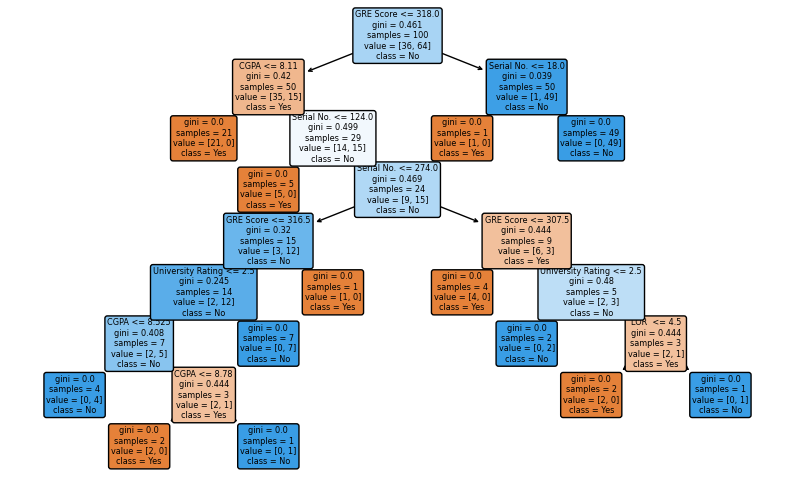

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
plot_tree(d_tree,filled=True,rounded=True,class_names=['Yes','No'],feature_names=df.columns)
plt.show()